In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import interpolate, signal, ndimage
from sklearn.linear_model import LinearRegression
# %matplotlib notebook

## Part A: X-Ray Emission

500V 72uA Dwell TIme:5s Res = 0.1

In [2]:
peak_20 = pd.read_csv('./data/20_kv.txt', delimiter = '\t')
peak_20

,angle [deg],counting rate [cps]
0,13.0,2.19
1,13.2,2.69
2,13.3,2.89
3,13.4,2.59
4,13.5,2.49
...,...,...
165,29.6,55.31
166,29.7,52.13
167,29.8,52.85
168,29.9,57.11


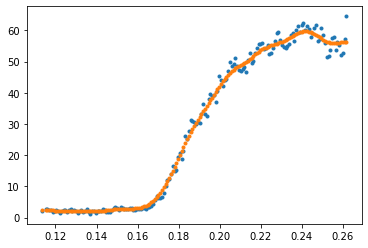

In [3]:
angles_20 = peak_20['angle [deg]'].values * np.pi/180 /2
intensity_20 = peak_20['counting rate [cps]'].values
filtered_intensity_20 = ndimage.gaussian_filter(intensity_20, sigma = 5)
plt.plot(angles_20, peak_20['counting rate [cps]'], '.')
plt.plot(angles_20,filtered_intensity_20, '.')
gradient_20 = np.gradient(filtered_intensity_20, angles_20)

[0.18064158] [1466.8345572]
x_cept [0.16661137]


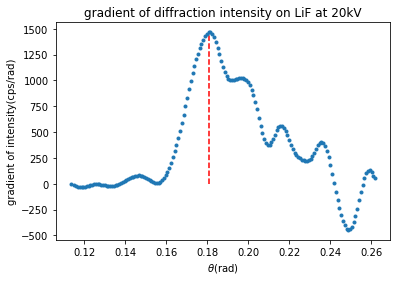

In [4]:
plt.plot(angles_20,gradient_20, '.')
widths = np.linspace(2, 10, num = 100)
peaks_20 = signal.find_peaks_cwt(gradient_20, widths)
angle_peak_20 = angles_20[peaks_20]
angle_peak_20 = angle_peak_20[angle_peak_20 > 0.35/2]
angle_peak_20 = angle_peak_20[angle_peak_20 < 0.37/2]

plt.vlines(angle_peak_20, -3, gradient_20[angles_20==angle_peak_20][0], color  ='r', lineStyle = '--')
plt.xlabel(r'$\theta$(rad)')
plt.ylabel('gradient of intensity(cps/rad)')
plt.title('gradient of diffraction intensity on LiF at 20kV')
gradient_20 = np.gradient(filtered_intensity_20, angles_20)
plt.savefig('./fig/grad20.png', dpi = 300)
print(angle_peak_20, gradient_20[angles_20==angle_peak_20] )
print('x_cept', angle_peak_20 - intensity_20[angles_20==angle_peak_20]/gradient_20[angles_20==angle_peak_20])

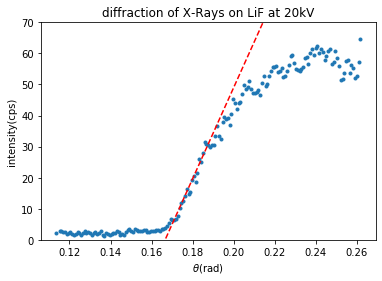

In [5]:
angles_20 = peak_20['angle [deg]'].values *np.pi/180 /2
intensity_20 = peak_20['counting rate [cps]'].values
filtered_intensity_20 = ndimage.gaussian_filter(intensity_20, sigma = 5)
plt.plot(angles_20, intensity_20, '.')
plt.plot(angles_20, gradient_20[angles_20==angle_peak_20][0]*(angles_20 - angle_peak_20 + intensity_20[angles_20==angle_peak_20]/gradient_20[angles_20==angle_peak_20]), 'r--')
plt.ylim([0, 70])
plt.xlabel(r'$\theta$(rad)')
plt.ylabel('intensity(cps)')
plt.title('diffraction of X-Rays on LiF at 20kV')
gradient_20 = np.gradient(filtered_intensity_20, angles_20)
plt.savefig('./fig/20kv.png', dpi = 300)

[0.13700835] [1977.83477243]
x_cept [0.11691567]


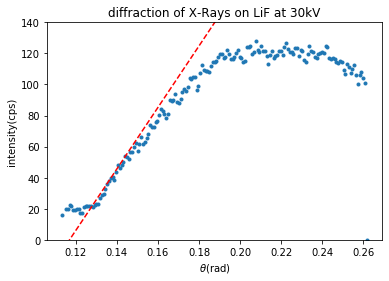

In [6]:
peak_30 = pd.read_csv('./data/30_kv.txt', delimiter = '\t')
angles_30 = peak_30['angle [deg]'].values*np.pi/180 /2
intensity_30 = peak_30['counting rate [cps]'].values
filtered_intensity_30 = ndimage.gaussian_filter(intensity_30, sigma = 5)
plt.plot(angles_30,intensity_30, '.')
# plt.plot(angles_30,filtered_intensity_30, '.')
gradient_30 = np.gradient(filtered_intensity_30, angles_30)
# plt.plot(angles_30,gradient_30, '.')
widths = np.linspace(10, 20, num = 100)
peaks_30 = signal.find_peaks_cwt(gradient_30, widths)
angle_peak_30 = angles_30[peaks_30]
angle_peak_30 = angle_peak_30[angle_peak_30 > 0.25/2]
angle_peak_30 = angle_peak_30[angle_peak_30 < 0.3/2]
# plt.vlines(angle_peak_30, 0 , 100)
plt.plot(angles_30, gradient_30[angles_30==angle_peak_30] *(angles_30 - angle_peak_30 + intensity_30[angles_30==angle_peak_30]/gradient_30[angles_30==angle_peak_30]), 'r--')
plt.ylim([0, 140])
plt.xlabel(r'$\theta$(rad)')
plt.ylabel('intensity(cps)')
plt.title('diffraction of X-Rays on LiF at 30kV')
# plt.vlines(angle_peak_30 - intensity_30[angles_30==angle_peak_30]/gradient_30[angles_30==angle_peak_30], 0 ,10)
plt.savefig('./fig/30kv.png', dpi = 300)
print(angle_peak_30, gradient_30[angles_30==angle_peak_30] )
print('x_cept', angle_peak_30 - intensity_30[angles_30==angle_peak_30]/gradient_30[angles_30==angle_peak_30])

In [21]:
theta_min = [angle_peak_20 - intensity_20[angles_20==angle_peak_20]/gradient_20[angles_20==angle_peak_20]]
theta_min.append(angle_peak_30 - intensity_30[angles_30==angle_peak_30]/gradient_30[angles_30==angle_peak_30])
theta_min = np.array(theta_min).flatten()
print(theta_min)
d = 0.404e-9
n = np.array([1,1])
lamda = d * np.sin(theta_min) /n
print(lamda)
V = np.array([20, 30]) * 1e3
e = 1.602e-19
c = 299792458
h = e * V * lamda/c
print(h)
print('h:',h.mean())
print('dh:',(h.max() - h.min())/2)


[0.16661137 0.11691567]
[6.70000054e-11 4.71263940e-11]
[7.16055430e-34 7.55487484e-34]
h: 7.357714565759137e-34
dh: 1.9716027009900535e-35


## Moseley’s Law

duration: 300s Deadtime: 1.4% I: 68.4$\mu$A

In [8]:
data = pd.read_csv('./data/element_peak.csv')
data

,Symbol,Peak(keV),std
0,Ni,7.40,0.22
1,Cu,7.96,0.23
2,Zn,8.54,0.23
3,V,4.93,0.27
4,Cr,5.39,0.27
5,Mn,5.86,0.26
6,Fe,6.35,0.27
7,Co,6.87,0.27


In [9]:
periodic_table = pd.read_csv('./data/periodic.csv')
periodic_table.head()

,AtomicNumber,Element,Symbol,AtomicMass,NumberofNeutrons,NumberofProtons,NumberofElectrons,Period,Group,Phase,...,FirstIonization,Density,MeltingPoint,BoilingPoint,NumberOfIsotopes,Discoverer,Year,SpecificHeat,NumberofShells,NumberofValence
0,1,Hydrogen,H,1.007,0,1,1,1,1.0,gas,...,13.5984,0.000090,14.175,20.28,3.0,Cavendish,1766.0,14.304,1,1.0
1,2,Helium,He,4.002,2,2,2,1,18.0,gas,...,24.5874,0.000179,NaN,4.22,5.0,Janssen,1868.0,5.193,1,NaN
2,3,Lithium,Li,6.941,4,3,3,2,1.0,solid,...,5.3917,0.534000,453.850,1615.00,5.0,Arfvedson,1817.0,3.582,2,1.0
3,4,Beryllium,Be,9.012,5,4,4,2,2.0,solid,...,9.3227,1.850000,1560.150,2742.00,6.0,Vaulquelin,1798.0,1.825,2,2.0
4,5,Boron,B,10.811,6,5,5,2,13.0,solid,...,8.2980,2.340000,2573.150,4200.00,6.0,Gay-Lussac,1808.0,1.026,2,3.0


In [10]:
periodic_table.loc[periodic_table['Symbol'].isin(data['Symbol'])]

,AtomicNumber,Element,Symbol,AtomicMass,NumberofNeutrons,NumberofProtons,NumberofElectrons,Period,Group,Phase,...,FirstIonization,Density,MeltingPoint,BoilingPoint,NumberOfIsotopes,Discoverer,Year,SpecificHeat,NumberofShells,NumberofValence
22,23,Vanadium,V,50.942,28,23,23,4,5.0,solid,...,6.7462,6.11,2175.15,3680.0,9.0,del Rio,1801.0,0.489,4,NaN
23,24,Chromium,Cr,51.996,28,24,24,4,6.0,solid,...,6.7665,7.15,2130.15,2944.0,9.0,Vauquelin,1797.0,0.449,4,NaN
24,25,Manganese,Mn,54.938,30,25,25,4,7.0,solid,...,7.4340,7.44,1519.15,2334.0,11.0,"Gahn, Scheele",1774.0,0.479,4,NaN
25,26,Iron,Fe,55.845,30,26,26,4,8.0,solid,...,7.9024,7.87,1808.15,3134.0,10.0,Prehistoric,NaN,0.449,4,NaN
26,27,Cobalt,Co,58.933,32,27,27,4,9.0,solid,...,7.8810,8.86,1768.15,3200.0,14.0,Brandt,1735.0,0.421,4,NaN
27,28,Nickel,Ni,58.693,31,28,28,4,10.0,solid,...,7.6398,8.91,1726.15,3186.0,11.0,Cronstedt,1751.0,0.444,4,NaN
28,29,Copper,Cu,63.546,35,29,29,4,11.0,solid,...,7.7264,8.96,1357.75,2835.0,11.0,Prehistoric,NaN,0.385,4,NaN
29,30,Zinc,Zn,65.380,35,30,30,4,12.0,solid,...,9.3942,7.13,692.88,1180.0,15.0,Prehistoric,NaN,0.388,4,NaN


In [11]:
data = pd.merge(data, periodic_table, on='Symbol').loc[:,'Symbol':'AtomicMass']
data

,Symbol,Peak(keV),std,AtomicNumber,Element,AtomicMass
0,Ni,7.40,0.22,28,Nickel,58.693
1,Cu,7.96,0.23,29,Copper,63.546
2,Zn,8.54,0.23,30,Zinc,65.380
3,V,4.93,0.27,23,Vanadium,50.942
4,Cr,5.39,0.27,24,Chromium,51.996
5,Mn,5.86,0.26,25,Manganese,54.938
6,Fe,6.35,0.27,26,Iron,55.845
7,Co,6.87,0.27,27,Cobalt,58.933


[0.22 0.23 0.23 0.27 0.27 0.26 0.27 0.27]


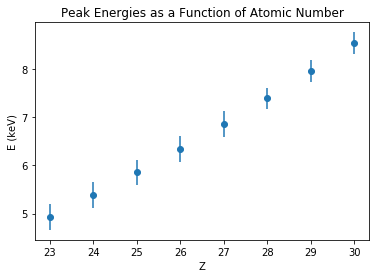

In [12]:
y_error =data['std'].values 
print(y_error)
plt.errorbar(data['AtomicNumber'], data['Peak(keV)'], yerr = y_error, marker = 'o', lineStyle = '')
plt.xlabel('Z')
plt.ylabel('E (keV)')
plt.title('Peak Energies as a Function of Atomic Number')
plt.savefig('./fig/peak_energy.png', dpi = 300)

score 0.9999915790725061
coefficient: [0.1001443]
intercept: -0.08286139069454634
0.00033556555778906035
x_cept(no randon): 0.8276361599440136
err: 0.030534787597646457


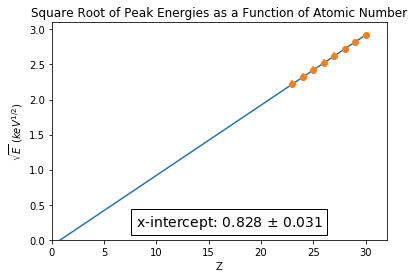

In [19]:
err = 1/2 * data['std'].values / data['Peak(keV)'] * data['Peak(keV)'] **0.5
X = data['AtomicNumber'].values.reshape(-1, 1)
y = (data['Peak(keV)']**0.5).values
model1 = LinearRegression()
reg = model1.fit(X, y)
print('score', reg.score(X,y))
print('coefficient:', reg.coef_)
print('intercept:', reg.intercept_)
S = (np.sum((y - model1.predict(X))**2)/(X.shape[0]-2))**0.5
err2 = S * X.shape[0]/(X.shape[0] *np.sum(X**2) - np.sum(X)**2)**0.5
print(err2)
plt.plot(np.arange(31) , reg.predict(np.arange(31).reshape(-1,1)))
plt.errorbar(data['AtomicNumber'], data['Peak(keV)']**0.5, yerr = err, marker = 'o', lineStyle = '')
plt.xlabel('Z')
plt.ylabel(r'$\sqrt{E}$ ($keV^{1/2}$)')
plt.xlim([0,32])
plt.ylim([0,3.1])
#Error Estimation for x-cept by assuming normal distribution of y value for each x
n = 1
new_y = np.array([y]*n)
new_x = np.array([X.reshape(-1)]*n)
# new_y += np.array([np.random.normal(0, err) for _ in range(n)])
model2 = LinearRegression().fit(new_y.reshape(-1,1), new_x.reshape(-1))
print('x_cept(no randon):', model2.intercept_)
S = (np.sum((X.reshape(-1) - model2.predict(y.reshape(-1,1)))**2)/(y.shape[0]-2))**0.5
err2 = S * (np.sum(y**2)/(y.shape[0] *np.sum(y**2) - np.sum(y)**2 ))**0.5
print("err:", err2)
props = dict(boxstyle='square', facecolor = 'white')
txt = plt.text(8, 0.2, r"x-intercept: {:.3f} $\pm$ {:.3f}".format(model2.intercept_,err2), fontsize=14, bbox=props)
plt.title('Square Root of Peak Energies as a Function of Atomic Number')
plt.savefig('./fig/shielding.png', dpi = 300)

In [14]:
10/(3/4)

13.333333333333334